# Understanding Customer Segmentation

According to marketing gurus, Philip Kotler and Gary Armstrong, customer segmentation is defined as “dividing a market into distinct groups of buyers who have distinct needs, characteristics, or behaviour and who might require separate products or marketing mixes” (Armstrong and Kotler, 2005: 54).

An except from the textbook Marketing Management (2012) explains,

To compete more effectively, many companies are now embracing target marketing. Instead of scattering their marketing
efforts, they’re focusing on those consumers they have the greatest chance of satisfying.
Effective target marketing requires that marketers:
1. Identify and profile distinct groups of buyers who differ in their needs and wants (market segmentation).
2. Select one or more market segments to enter (market targeting).
3. For each target segment, establish and communicate the distinctive benefit(s) of the company’s market offering
(market positioning).

In simpler words, as companies do not have infinite resources, they need to divide their customers into smaller segments or groups so that they can identify high potential segments and focus their attention on those segments. There are many ways to segment customers, for example by age groups, genders, geograpical locations, education levels, etc. One of the most popular and effective methods to segment customers is using RFM (Recency, Frequency, Monetary) analysis.

According to Chen et al. (2012), RFM (Recency, Frequency, Monetary) analysis is a behaviour-based approach of grouping customers into segments. It groups the customers on the basis of their previous purchase transactions i.e. how recently, how often, and how much did a customer buy. RFM segments customers into various groups or clusters and helps managers to identify more important / profitable segments to focus their attention and effort. It also helps marketers to identify customers who are more likely to respond to promotions and also for future personalization services.

Recency (R): Who have purchased recently? It means the number of days since last purchase (least recency is better)
Frequency (F): Who have purchased frequently? It means the total number of purchases. (high frequency is better)
Monetary (M): Who have high purchase amount? It means the total money customer spent (high monetary is better)

RFM analysis is based on the Pareto principle that 80% of your business comes from 20% of your customers. The 3-dimensional approach provides a more holistic view on segmentation compared to the traditional single dimension approach which often segment customers based on sales value or volume only. For example, there may be a segment of customers who is the big spender (in terms of sales value) but what if they only purchase once or twice a year? Or they may be a customer segment who purchase frequently but what if the value is very small? Are they worth the marketers' time and effort? RFM analysis helps to overcome these shortcomings by providing a more holistic and effective approach to customer segmentation.

# Import Libraries and Load Dataset

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
import scipy.stats
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [47]:
commerce = pd.read_csv("Ecommerce.csv", encoding='unicode_escape')

In [48]:
commerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [49]:
commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [50]:
commerce.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909,0.0
unique,25900,4070,4223,NaN,305,NaN,NaN,38,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,3-Dec-17,NaN,NaN,United Kingdom,NaN
freq,1114,2313,2369,NaN,5331,NaN,NaN,495478,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN,NaN


The .describe() method is a powerful function available in many data analysis libraries, including Pandas and Numpy, that provides a comprehensive statistical summary of a dataset's numerical columns. This method generates descriptive statistics that include count, mean, standard deviation, minimum, maximum, and various percentiles (25%, 50%, and 75%).

In [51]:
commerce = commerce.drop(columns = "Unnamed: 8")
commerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


The problem that the code snippet is trying to solve is removing the column with the label "Unnamed: 8" because it is an empty column that consist of result of a mistake.
The solution being used is to call the .drop() method on the "commerce" DataFrame and pass "Unnamed: 8" as the columns parameter to specify which column to drop. The .drop() method is a commonly used method in data analysis libraries such as Pandas and Numpy, and it allows the user to remove one or more columns from a DataFrame. By passing the label of the column to drop, the method will remove that column and return a new DataFrame with the specified columns removed.

In [52]:
df = commerce.copy()

# Handle with Missing Values

The columns that are required for RFM analysis are InvoiceNo, Quantity, InvoiceDate, UnitPrice and CustomerID. We need to make sure there are no missing values in these columns or that they are treated prior to the analysis.

In [53]:
# check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Note: The are 135,080 missing values for the column CustomerID which is important for RFM analysis. In this case, there is not much we can do as CustomerIDs are unique values, it does not make sense to impute the missing values with calculated values. So, we will only work with the portion of the dataframe with no missing values

In [54]:
# select the portion of dataframe with no missing values for the column "CustomerID"
df = df[pd.notnull(df["CustomerID"])]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


Note: The are 406,829 rows with no missing values

# Remove Duplicate Values

We can check for any duplicate values in the dataframe using function .duplicated() and remove them accordingly using function drop_duplicates().

In [56]:
print("There are {} duplicated values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)].head(10)

There are 5226 duplicated values.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,29-Nov-16,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,29-Nov-16,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,29-Nov-16,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,29-Nov-16,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,29-Nov-16,2.95,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,29-Nov-16,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,29-Nov-16,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,29-Nov-16,4.95,17908.0,United Kingdom
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,29-Nov-16,2.95,17920.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,29-Nov-16,2.95,17920.0,United Kingdom


Note: From the table above, we can see that item 485 and 539 are duplicates, item 489 and 527 are duplicates and so on... The duplicated values need to be removed. We will use .drop_duplicates() function to drop duplicates except for the first occurrence.

In [57]:
data = df.drop_duplicates()
# check for duplicates after removing duplicates
data.duplicated().sum()

0

Note: There are no more duplicate values

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401603 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401603 non-null  object 
 1   StockCode    401603 non-null  object 
 2   Description  401603 non-null  object 
 3   Quantity     401603 non-null  int64  
 4   InvoiceDate  401603 non-null  object 
 5   UnitPrice    401603 non-null  float64
 6   CustomerID   401603 non-null  float64
 7   Country      401603 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


Note: Now the filtered data is left with 401,604 rows which is the result of 406,829 minus 5,225 duplicates

In [59]:
data.Country.replace(["Unspecified", "EIRE", "RSA", "USA"], ["United Kingdom", "Ireland", "Republic of South Africa", "United States of America"], inplace = True)
data.Country.value_counts().head()

C:\Users\ERDEM\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


United Kingdom    356968
Germany             9480
France              8475
Ireland             7475
Spain               2528
Name: Country, dtype: int64

# Data Exploration

Since the data is from an online retailer, we will look at where their customers originate from i.e. countries

In [60]:
# filter customers by top 10 countries in percentage
data.Country.value_counts(normalize=True)[:10]

United Kingdom    0.888858
Germany           0.023605
France            0.021103
Ireland           0.018613
Spain             0.006295
Netherlands       0.005904
Belgium           0.005152
Switzerland       0.004674
Portugal          0.003663
Australia         0.003132
Name: Country, dtype: float64

Note: United Kingdom alone accounts for 88.8% of all countries

<AxesSubplot:>

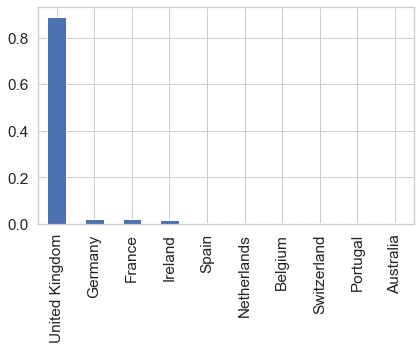

In [61]:
# visualize in bar chart
data.Country.value_counts(normalize=True)[:10].plot(kind="bar")

Note: We can filter and only select customers from United Kingdom, which are considered as "local customers" for the online retailer since the online retailer is UK-based. This will serves as a good starting point for our analysis and also for the online retailer to focus their marketing effort

In [62]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,401603.000000,401603.000000,401603.000000
mean,12.183298,3.474067,15281.162093
std,250.283348,69.764122,1714.008032
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


Note: From the summary statistics above, we notice that the minimum value for Quantity is strangely negative -80995 which does not make sense. Upon careful study of the data description from UCI Machine Learning Repository website where this dataset is obtained, it is discovered that some transaction records in this dataset are "cancellations". This can be noticed from the column InvoiceNo which is a 6-digit integral number uniquely assigned to each transaction. But it is stored as "Object" instead of "Integer", this is because some of the InvoiceNo starts with letter 'C', which indicates a cancellation.

In [63]:
# showing cancelled transactions
data[data["InvoiceNo"].str.startswith("C", na=False)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,29-Nov-16,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,29-Nov-16,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,29-Nov-16,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,29-Nov-16,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,29-Nov-16,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,29-Nov-16,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,29-Nov-16,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,29-Nov-16,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,29-Nov-16,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,29-Nov-16,4.25,17897.0,United Kingdom


Note: From the cancellation cases above, the InvoiceNo starts with "C" and the Quantity is negative value

In [64]:
processed_data = data.drop(["StockCode", "Description"], axis=1)
processed_data.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,6,29-Nov-16,3.39,17850.0,United Kingdom


# RFM Analysis

As mentioned earlier, we only need five columns from the raw data i.e. CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice.

CustomerId will uniquely define our customers
InvoiceDate help us calculate recency of purchase (Recency)
InvoiceNo helps us to count the number of time transaction performed (Frequency)
Quantity purchased in each transaction and UnitPrice of each unit will help to calculate the total purchased amount (Monetary)

## Recency
To calculate Recency, we calculate the number of days between present date (i.e. Today) and date of last purchase of each customer. We first define today's date and then get the .max() function of InvoiceDate to calculate the number of days between today and date of last purchase.

In [65]:
processed_data['InvoiceDate'] = pd.to_datetime(processed_data['InvoiceDate'])
commer = commerce.sort_values(by=['CustomerID', 'InvoiceDate'], ascending=[True, False])
commer = commerce.drop_duplicates(subset='CustomerID', keep='first')
commer = commerce.sort_values(by='InvoiceDate', ascending=False)
commer['InvoiceDate'] = commer['InvoiceDate'].astype(str)
# First, split the InvoiceDate column into multiple rows, one for each comma-separated value
commer = commer.set_index('CustomerID')['InvoiceDate'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='InvoiceDate')

# Convert the InvoiceDate column to datetime
commer['InvoiceDate'] = pd.to_datetime(commer['InvoiceDate'])

# Group the data by customer_id and keep only the row with the maximum InvoiceDate
commer = commer.groupby('CustomerID').max().reset_index()
commer.sample(10)

,CustomerID,InvoiceDate
1572,14474.0,2017-10-25
3271,16770.0,2017-10-11
2629,15895.0,2017-07-11
387,12832.0,2017-11-05
2139,15240.0,2017-10-24
3561,17174.0,2017-05-04
2549,15787.0,2017-11-11
3769,17462.0,2017-10-17
1161,13900.0,2017-06-07
3376,16914.0,2017-11-01


In [66]:
commer["Recency"] = commer['InvoiceDate'].max() - commer['InvoiceDate']
commer['Recency'] = commer['Recency'].astype(str)
commer['Recency'] = commer['Recency'].str.split(" ").str[0].astype(int)
commer.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2017-01-16,325
1,12347.0,2017-12-05,2
2,12348.0,2017-09-23,75
3,12349.0,2017-11-19,18
4,12350.0,2017-01-31,310


## Frequency

To calculate Frequency, we calculate the number of purchases for each customer.

In [67]:
frequency = processed_data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency = frequency.rename(columns = {"InvoiceNo" : "Frequency"})
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


## Monetary
To calculate Monetary, we calculate the sum of purchase price for each customer. To do this, we create a new column `TotalPrice` which is the product of `Quantity` purchased in each transaction and `UnitPrice` of each unit

In [68]:
processed_data["TotalPrice"] = processed_data["Quantity"] * processed_data["UnitPrice"]
monetary = processed_data.groupby("CustomerID")["TotalPrice"].max().reset_index()
monetary = monetary.rename(columns = {"TotalPrice" : "Monetary"})
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.6
1,12347.0,249.6
2,12348.0,240.0
3,12349.0,300.0
4,12350.0,40.0


In [69]:
RFM = pd.concat([commer[["Recency"]], frequency[["Frequency"]], monetary[["Monetary"]]], axis = 1)
RFM.index = monetary["CustomerID"].values
RFM

,Recency,Frequency,Monetary
12346.0,325,2,77183.60
12347.0,2,7,249.60
12348.0,75,4,240.00
12349.0,18,1,300.00
12350.0,310,1,40.00
...,...,...,...
18280.0,277,1,23.70
18281.0,180,1,16.95
18282.0,7,3,25.50
18283.0,3,16,20.80


# Handling Outliers

## Using Boxplot

C:\Users\ERDEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ERDEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ERDEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


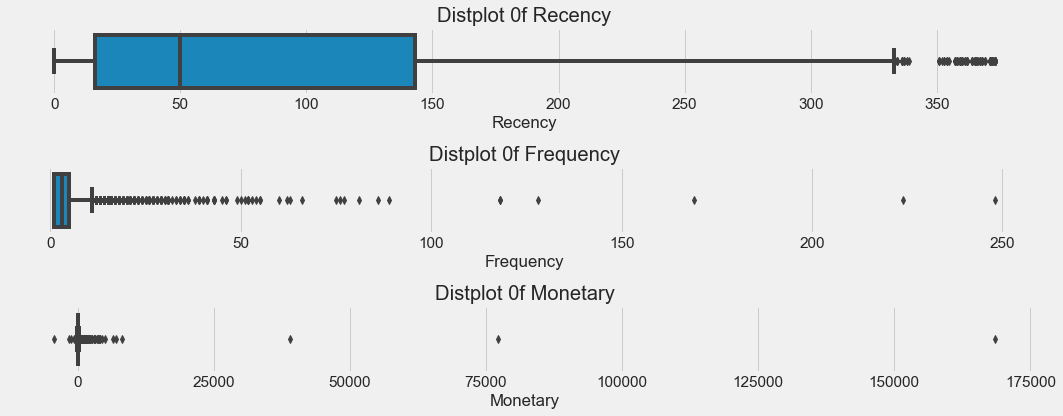

In [70]:
plt.style.use("fivethirtyeight")

plt.figure(1, figsize=(15,6))
n = 0
for x in ['Recency', 'Frequency', 'Monetary']:
    n += 1
    plt.subplot(3, 1, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.boxplot(RFM[x])
    plt.title('Distplot 0f {}'.format(x))
plt.tight_layout()
plt.show()

In this code, boxplots are used to visualize the distribution of the "Recency", "Frequency", and "Monetary" columns of the RFM DataFrame. Boxplots are a powerful tool for visualizing the distribution of a dataset, particularly when comparing multiple datasets side by side. The code uses sns.boxplot() function to create the boxplots.

A boxplot is a graphical representation of a five-number summary of a dataset, which includes the minimum, first quartile (Q1), median (second quartile, Q2), third quartile (Q3), and maximum. The box in the boxplot represents the middle 50% of the data, with the lower and upper edges of the box corresponding to Q1 and Q3, respectively. The line inside the box represents the median. The whiskers extend from the edges of the box to the minimum and maximum values within 1.5 times the interquartile range (IQR) of the box. Any points outside the whiskers are considered outliers.

Compared to histograms, boxplots provide several advantages. First, they provide a quick and easy way to visualize the central tendency, spread, and skewness of a dataset. Second, they allow for easy comparison of multiple datasets side by side, as the boxes and whiskers can be directly compared. Finally, boxplots are particularly useful for identifying outliers and extreme values in a dataset.

Overall, using both boxplots and histograms can be an effective way to gain insights into the distribution of a dataset and identify any potential issues or anomalies that may need to be addressed in further analysis.

## Detecting Outliers Using IQR Method

In [71]:
RFM

,Recency,Frequency,Monetary
12346.0,325,2,77183.60
12347.0,2,7,249.60
12348.0,75,4,240.00
12349.0,18,1,300.00
12350.0,310,1,40.00
...,...,...,...
18280.0,277,1,23.70
18281.0,180,1,16.95
18282.0,7,3,25.50
18283.0,3,16,20.80


In [72]:
cols = ['Recency', 'Frequency', 'Monetary']
for i in cols:
    Q1 = RFM[i].describe()['25%']
    Q2 = RFM[i].describe()['50%']
    Q3 = RFM[i].describe()['75%']
    IQR = (Q3 - Q1) * 1.5
    lower_bound = Q1 - IQR
    upper_bound = Q3 + IQR

    def find_outliers(feature):
        outliers = [x for x in feature if x > upper_bound or x < lower_bound]
        return outliers

    outliers = find_outliers(RFM[i].values)
    if len(outliers) == 0:
        print('Feature {} has NO Outliers'.format(i))
    else:
        print('Feature {} has {} Outliers'.format(i, len(outliers)))

Feature Recency has 143 Outliers
Feature Frequency has 397 Outliers
Feature Monetary has 501 Outliers


Detecting outliers is an important step in data analysis because outliers can significantly affect the accuracy and reliability of statistical models. Outliers are observations that are significantly different from other observations in the dataset and can be caused by a variety of factors, such as measurement errors, data entry errors, or natural variability in the data.

The Interquartile Range (IQR) method is a commonly used technique for identifying outliers in a dataset. The IQR is defined as the difference between the third quartile (Q3) and the first quartile (Q1) of a dataset. The lower bound is calculated by subtracting 1.5 times the IQR from Q1, and the upper bound is calculated by adding 1.5 times the IQR to Q3. Any observation that falls outside the lower or upper bound is considered an outlier.

The code snippet is using the IQR method to detect outliers in the "Recency", "Frequency", and "Monetary" columns of a DataFrame called "RFM". The code first calculates the quartiles and the IQR for each column and then defines a function called "find_outliers" that takes a feature (i.e., a column of the DataFrame) and returns a list of outliers. The function checks if each observation in the feature is greater than the upper bound or less than the lower bound and adds it to the outliers list if it is. Finally, the code prints a message indicating whether each feature has any outliers or not.

Overall, the code snippet is a useful way to detect outliers in a dataset using the IQR method and can help ensure the accuracy and reliability of statistical models that use the data.

## Using Data Rescaling

In [73]:
rfm_positive = RFM[(RFM['Monetary'] > 0) & (RFM['Recency'] > 0)]

Create a DataFrame without Minus(-) Transaction to avoid Infinite Number when calculate the Log value

In [74]:
for i in cols :
    rfm_positive['Log_of_{}'.format(i)] = [np.log(x) for x in rfm_positive[i]]

<ipython-input-74-586ebc7ad296>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_positive['Log_of_{}'.format(i)] = [np.log(x) for x in rfm_positive[i]]


Generate Feature of Logged value for each Recency, Frequency, and Monetary

In [75]:
rfm_positive.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4300 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Recency           4300 non-null   int32  
 1   Frequency         4300 non-null   int64  
 2   Monetary          4300 non-null   float64
 3   Log_of_Recency    4300 non-null   float64
 4   Log_of_Frequency  4300 non-null   float64
 5   Log_of_Monetary   4300 non-null   float64
dtypes: float64(4), int32(1), int64(1)
memory usage: 218.4 KB


## Distribution Plot of Recency, Frequency, and Monetary after Outliers Handling with Data Rescalling

C:\Users\ERDEM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ERDEM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ERDEM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

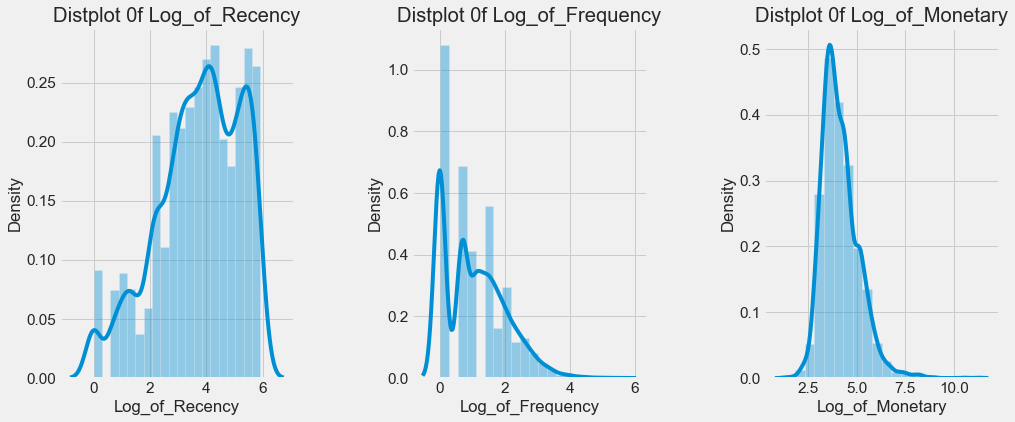

In [76]:
plt.style.use("fivethirtyeight")

plt.figure(1, figsize=(15,6))
n = 0
for x in ['Log_of_Recency', 'Log_of_Frequency', 'Log_of_Monetary']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(rfm_positive[x], bins = 20)
    plt.title('Distplot 0f {}'.format(x))
plt.show()

This code generates a distribution plot of the "Log_of_Recency", "Log_of_Frequency", and "Log_of_Monetary" columns of a DataFrame called "rfm_positive" after handling outliers and rescaling the data.

The code uses the plt.figure() function to create a new figure with a size of (15,6), which determines the width and height of the plot. The plt.subplot() function is used to create a 1x3 grid of subplots, where each subplot shows the distribution of one of the three columns. The plt.subplots_adjust() function is used to adjust the spacing between the subplots to make them more readable.

The sns.distplot() function is used to plot the distribution of each column, with the bins parameter set to 20 to control the number of bins used in the histogram. The sns.distplot() function is a convenient way to plot a histogram and a kernel density estimate (KDE) of a dataset in a single plot.

Finally, the plt.title() function is used to set the title of each subplot, and plt.show() is used to display the plot.

Overall, this code is a useful way to visualize the distribution of the three columns after handling outliers and rescaling the data, which can help identify any remaining data quality issues and ensure the accuracy and reliability of statistical models that use the data.

# Model: RFM scoring + K-Means clustering

In this approach we used RFM scoring(assigned RFM score) and K-means clustering.

## Transformation of variables:

The next step is to transform all three variables. The RFM method requires ordinal variables and this can be done in several ways, we will use the percentiles of the distribution of the given variable. Scaling is not required.

The labels will be values 1-4. When labeling the values of variables, it is important to remember that the higher label should mean the better situation of the person from the point of view of the seller. In the case of "Recency" - the smaller value of the variable, the higher label (we prefer clients who are active). In the case of "Frequency" - the greater value of the variable, the higher label (we prefer customers who buy more often and for large amounts).

In [77]:
rec = pd.qcut(RFM["Recency"], 4, ["1","2","3","4"])
freq = pd.qcut(RFM["Frequency"], 4, ["3","2","1"], duplicates="drop")
mon = pd.qcut(RFM["Monetary"], 4, ["4","3","2","1"])
RFM_cutted = pd.DataFrame({'Recency' : rec, 'Frequency' : freq, 'Monetary' : mon})
RFM_cutted

,Recency,Frequency,Monetary
12346.0,4,3,1
12347.0,1,1,1
12348.0,3,2,1
12349.0,2,3,1
12350.0,4,3,3
...,...,...,...
18280.0,4,3,4
18281.0,4,3,4
18282.0,1,3,4
18283.0,1,1,4


In [78]:
RFM_cutted_values = RFM_cutted.values

## K-Means clustering model
K-means is an unsupervised machine learning algorithm, which is used for data clustering. In k-means algorithm number of clusters K is predetermined and the algorithm iteratively assigns each data point to one of the K clusters based on the feature similarity.

We will find the optimal number of clusters using the elbow method:

In [79]:
group = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(RFM_cutted_values)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number_of_group', 'inertia'])
groups

,number_of_group,inertia
0,1,14128.676807
1,2,8413.975039
2,3,5907.923357
3,4,4203.020400
4,5,3603.767378
5,6,2953.900342
6,7,2790.212791
7,8,2395.289445
8,9,2110.106525
9,10,1994.703983


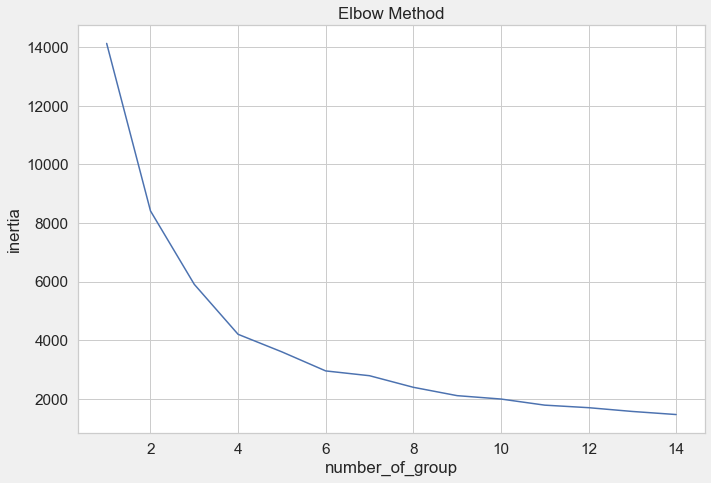

In [80]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = groups, x = 'number_of_group', y = 'inertia').set(title = "Elbow Method")
plt.show()

## Determining K-Values Using Silhouette Analysis

In [81]:
rfm_new = rfm_positive[['Log_of_Recency', 'Log_of_Frequency', 'Log_of_Monetary']]
rfm_new.head()

,Log_of_Recency,Log_of_Frequency,Log_of_Monetary
12346.0,5.783825,0.693147,11.253942
12347.0,0.693147,1.945910,5.519860
12348.0,4.317488,1.386294,5.480639
12349.0,2.890372,0.000000,5.703782
12350.0,5.736572,0.000000,3.688879


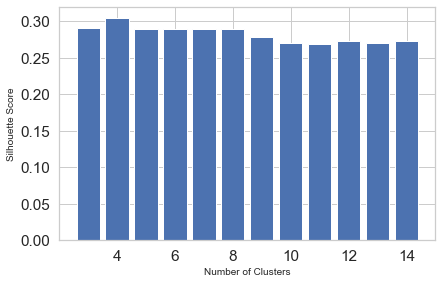

In [82]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(3,15):
    silhouette_scores.append(
    silhouette_score(rfm_new, KMeans(n_clusters = n_cluster).fit_predict(rfm_new)))
    
#Plotting the silhouette score
k = [3,4,5,6,7,8,9,10,11,12,13,14]
plt.bar(k, silhouette_scores)
plt.xlabel("Number of Clusters", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.show()

## Model Fitting and Prediction

In [83]:
# Fitting Model
model_KM = KMeans(n_clusters = 4, max_iter = 10000)


model_KM.fit(rfm_new)

KMeans(max_iter=10000, n_clusters=4)

In [84]:
#Predict Cluster

rfm_new['K-Means'] = model_KM.predict(rfm_new)
rfm_new.head()

<ipython-input-84-c09218542a4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_new['K-Means'] = model_KM.predict(rfm_new)


,Log_of_Recency,Log_of_Frequency,Log_of_Monetary,K-Means
12346.0,5.783825,0.693147,11.253942,3
12347.0,0.693147,1.945910,5.519860,2
12348.0,4.317488,1.386294,5.480639,3
12349.0,2.890372,0.000000,5.703782,3
12350.0,5.736572,0.000000,3.688879,1


In [85]:
rfm_new.groupby('K-Means').agg(['mean'])

,Log_of_Recency,Log_of_Frequency,Log_of_Monetary
,mean,mean,mean
K-Means,,,
0,3.201131,0.862712,3.610799
1,5.158384,0.382709,3.722812
2,1.423872,2.179567,4.686867
3,3.983659,1.537168,5.141902


rfm_new[rfm_new['Gaussian Mixture'] == 1].describe()

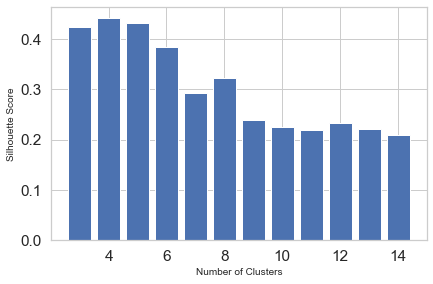

In [86]:
silhouette_scores = []

for n_cluster in range(3, 15):
    gmm_cluster = GaussianMixture(n_components=n_cluster, random_state=42)
    cluster_labels = gmm_cluster.fit_predict(rfm_new)
    silhouette_scores.append(silhouette_score(rfm_new, cluster_labels))
k = range(3, 15)
plt.bar(k, silhouette_scores)
plt.xlabel("Number of Clusters", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.show()

In [87]:
from sklearn.mixture import GaussianMixture
model_GM = GaussianMixture(n_components = 7)
model_GM.fit(rfm_new)
rfm_new['Gaussian Mixture'] = model_GM.predict(rfm_new)

<ipython-input-87-a1ed09bbb935>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_new['Gaussian Mixture'] = model_GM.predict(rfm_new)


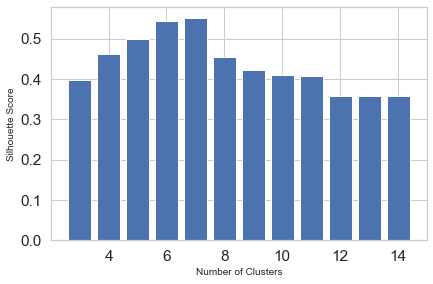

In [88]:
silhouette_scores = []

for n_cluster in range(3, 15):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=n_cluster)
    cluster_labels = hierarchical_cluster.fit_predict(rfm_new)
    silhouette_scores.append(silhouette_score(rfm_new, cluster_labels))
k = range(3, 15)
plt.bar(k, silhouette_scores)
plt.xlabel("Number of Clusters", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.show()

In [89]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
Z = linkage(rfm_new, method = 'ward', metric = 'euclidean')
rfm_new['Hierarchical Clustering'] = fcluster(Z, 7, criterion = 'maxclust')

In [90]:
rfm_new

,Log_of_Recency,Log_of_Frequency,Log_of_Monetary,K-Means,Gaussian Mixture,Hierarchical Clustering
12346.0,5.783825,0.693147,11.253942,3,6,1
12347.0,0.693147,1.945910,5.519860,2,5,3
12348.0,4.317488,1.386294,5.480639,3,6,1
12349.0,2.890372,0.000000,5.703782,3,6,1
12350.0,5.736572,0.000000,3.688879,1,0,4
...,...,...,...,...,...,...
18280.0,5.624018,0.000000,3.165475,1,0,4
18281.0,5.192957,0.000000,2.830268,1,0,4
18282.0,1.945910,1.098612,3.238678,0,1,7
18283.0,1.098612,2.772589,3.034953,2,5,3


In [91]:
rfm = pd.concat([rfm_new, rfm_positive[['Recency', 'Frequency', 'Monetary']]], axis=1)
rfm

,Log_of_Recency,Log_of_Frequency,Log_of_Monetary,K-Means,Gaussian Mixture,Hierarchical Clustering,Recency,Frequency,Monetary
12346.0,5.783825,0.693147,11.253942,3,6,1,325,2,77183.60
12347.0,0.693147,1.945910,5.519860,2,5,3,2,7,249.60
12348.0,4.317488,1.386294,5.480639,3,6,1,75,4,240.00
12349.0,2.890372,0.000000,5.703782,3,6,1,18,1,300.00
12350.0,5.736572,0.000000,3.688879,1,0,4,310,1,40.00
...,...,...,...,...,...,...,...,...,...
18280.0,5.624018,0.000000,3.165475,1,0,4,277,1,23.70
18281.0,5.192957,0.000000,2.830268,1,0,4,180,1,16.95
18282.0,1.945910,1.098612,3.238678,0,1,7,7,3,25.50
18283.0,1.098612,2.772589,3.034953,2,5,3,3,16,20.80


Distribution of the size of individual groups:

In [92]:
rfm.groupby('Gaussian Mixture').agg(['mean'])

,Log_of_Recency,Log_of_Frequency,Log_of_Monetary,K-Means,Hierarchical Clustering,Recency,Frequency,Monetary
,mean,mean,mean,mean,mean,mean,mean,mean
Gaussian Mixture,,,,,,,,
0,5.158384,0.382709,3.722812,1,4,197.100955,1.707367,52.235866
1,3.196059,1.192255,3.664053,0,7,29.701254,3.742303,43.009886
2,3.767943,1.660546,4.560744,3,5,49.924138,6.091954,102.878437
3,0.677068,3.188068,6.018875,2,2,2.592593,33.685185,786.055278
4,3.214410,0.000000,3.471385,0,6,30.026866,1.000000,38.218716
5,1.550291,2.008849,4.461386,2,3,6.222571,9.525078,111.331113
6,4.196440,1.415469,5.715154,3,1,90.299320,6.063492,698.830794


Our valued customers are:

In [93]:
rfm[rfm["K-Means"]==2].describe()

,Log_of_Recency,Log_of_Frequency,Log_of_Monetary,K-Means,Gaussian Mixture,Hierarchical Clustering,Recency,Frequency,Monetary
count,746.000000,746.000000,746.000000,746.0,746.000000,746.000000,746.000000,746.000000,746.000000
mean,1.423872,2.179567,4.686867,2.0,4.710456,2.855228,5.697051,13.022788,209.012359
std,0.849622,0.842927,0.940675,0.0,0.704214,0.352107,4.206664,16.618120,501.135330
min,0.000000,0.000000,2.833213,2.0,3.000000,2.000000,1.000000,1.000000,17.000000
25%,0.693147,1.609438,3.990464,2.0,5.000000,3.000000,2.000000,5.000000,54.080000
50%,1.386294,2.197225,4.519612,2.0,5.000000,3.000000,4.000000,9.000000,91.800000
75%,2.079442,2.708050,5.192957,2.0,5.000000,3.000000,8.000000,15.000000,180.000000
max,3.044522,5.513429,8.874129,2.0,5.000000,3.000000,21.000000,248.000000,7144.720000


#### Explanation: 
VIP clients are constantly shopping with us, spending large sums of money, and it has not been long since their last purchase.

#### Marketing strategy:
We can apply a typical promotional strategy would focus certain efforts for the high value customers. For the best customers example actions may it be: special offers with discounts, customer cards entitling to benefits (e.g. collecting points redeemed for rewards) or a gift for the next order.